In [2]:
%matplotlib inline
# Import necessary libraries
!pip install mglearn
!git clone https://github.com/brighamfrandsen/econ484.git
%cd econ484/utilities
from preamble import *
%cd content/econ484/data

plt.rcParams['image.cmap'] = "gray"
from sklearn.model_selection import train_test_split

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 17.9 MB/s eta 0:00:00
Cloning into 'econ484'...
remote: Enumerating objects: 119, done.
remote: Counting objects: 100% (116/116), done.
remote: Compressing objects: 100% (99/99), done.
remote: Total 119 (delta 38), reused 26 (delta 12), pack-reused 3 (from 1)
Receiving objects: 100% (119/119), 2.89 MiB | 3.82 MiB/s, done.
Resolving deltas: 100% (38/38), done.
/content/econ484/utilities/econ484/utilities


[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/brighamfrandsen/econ484/blob/master/examples/clustering.ipynb)

### Clustering

#### k-Means clustering

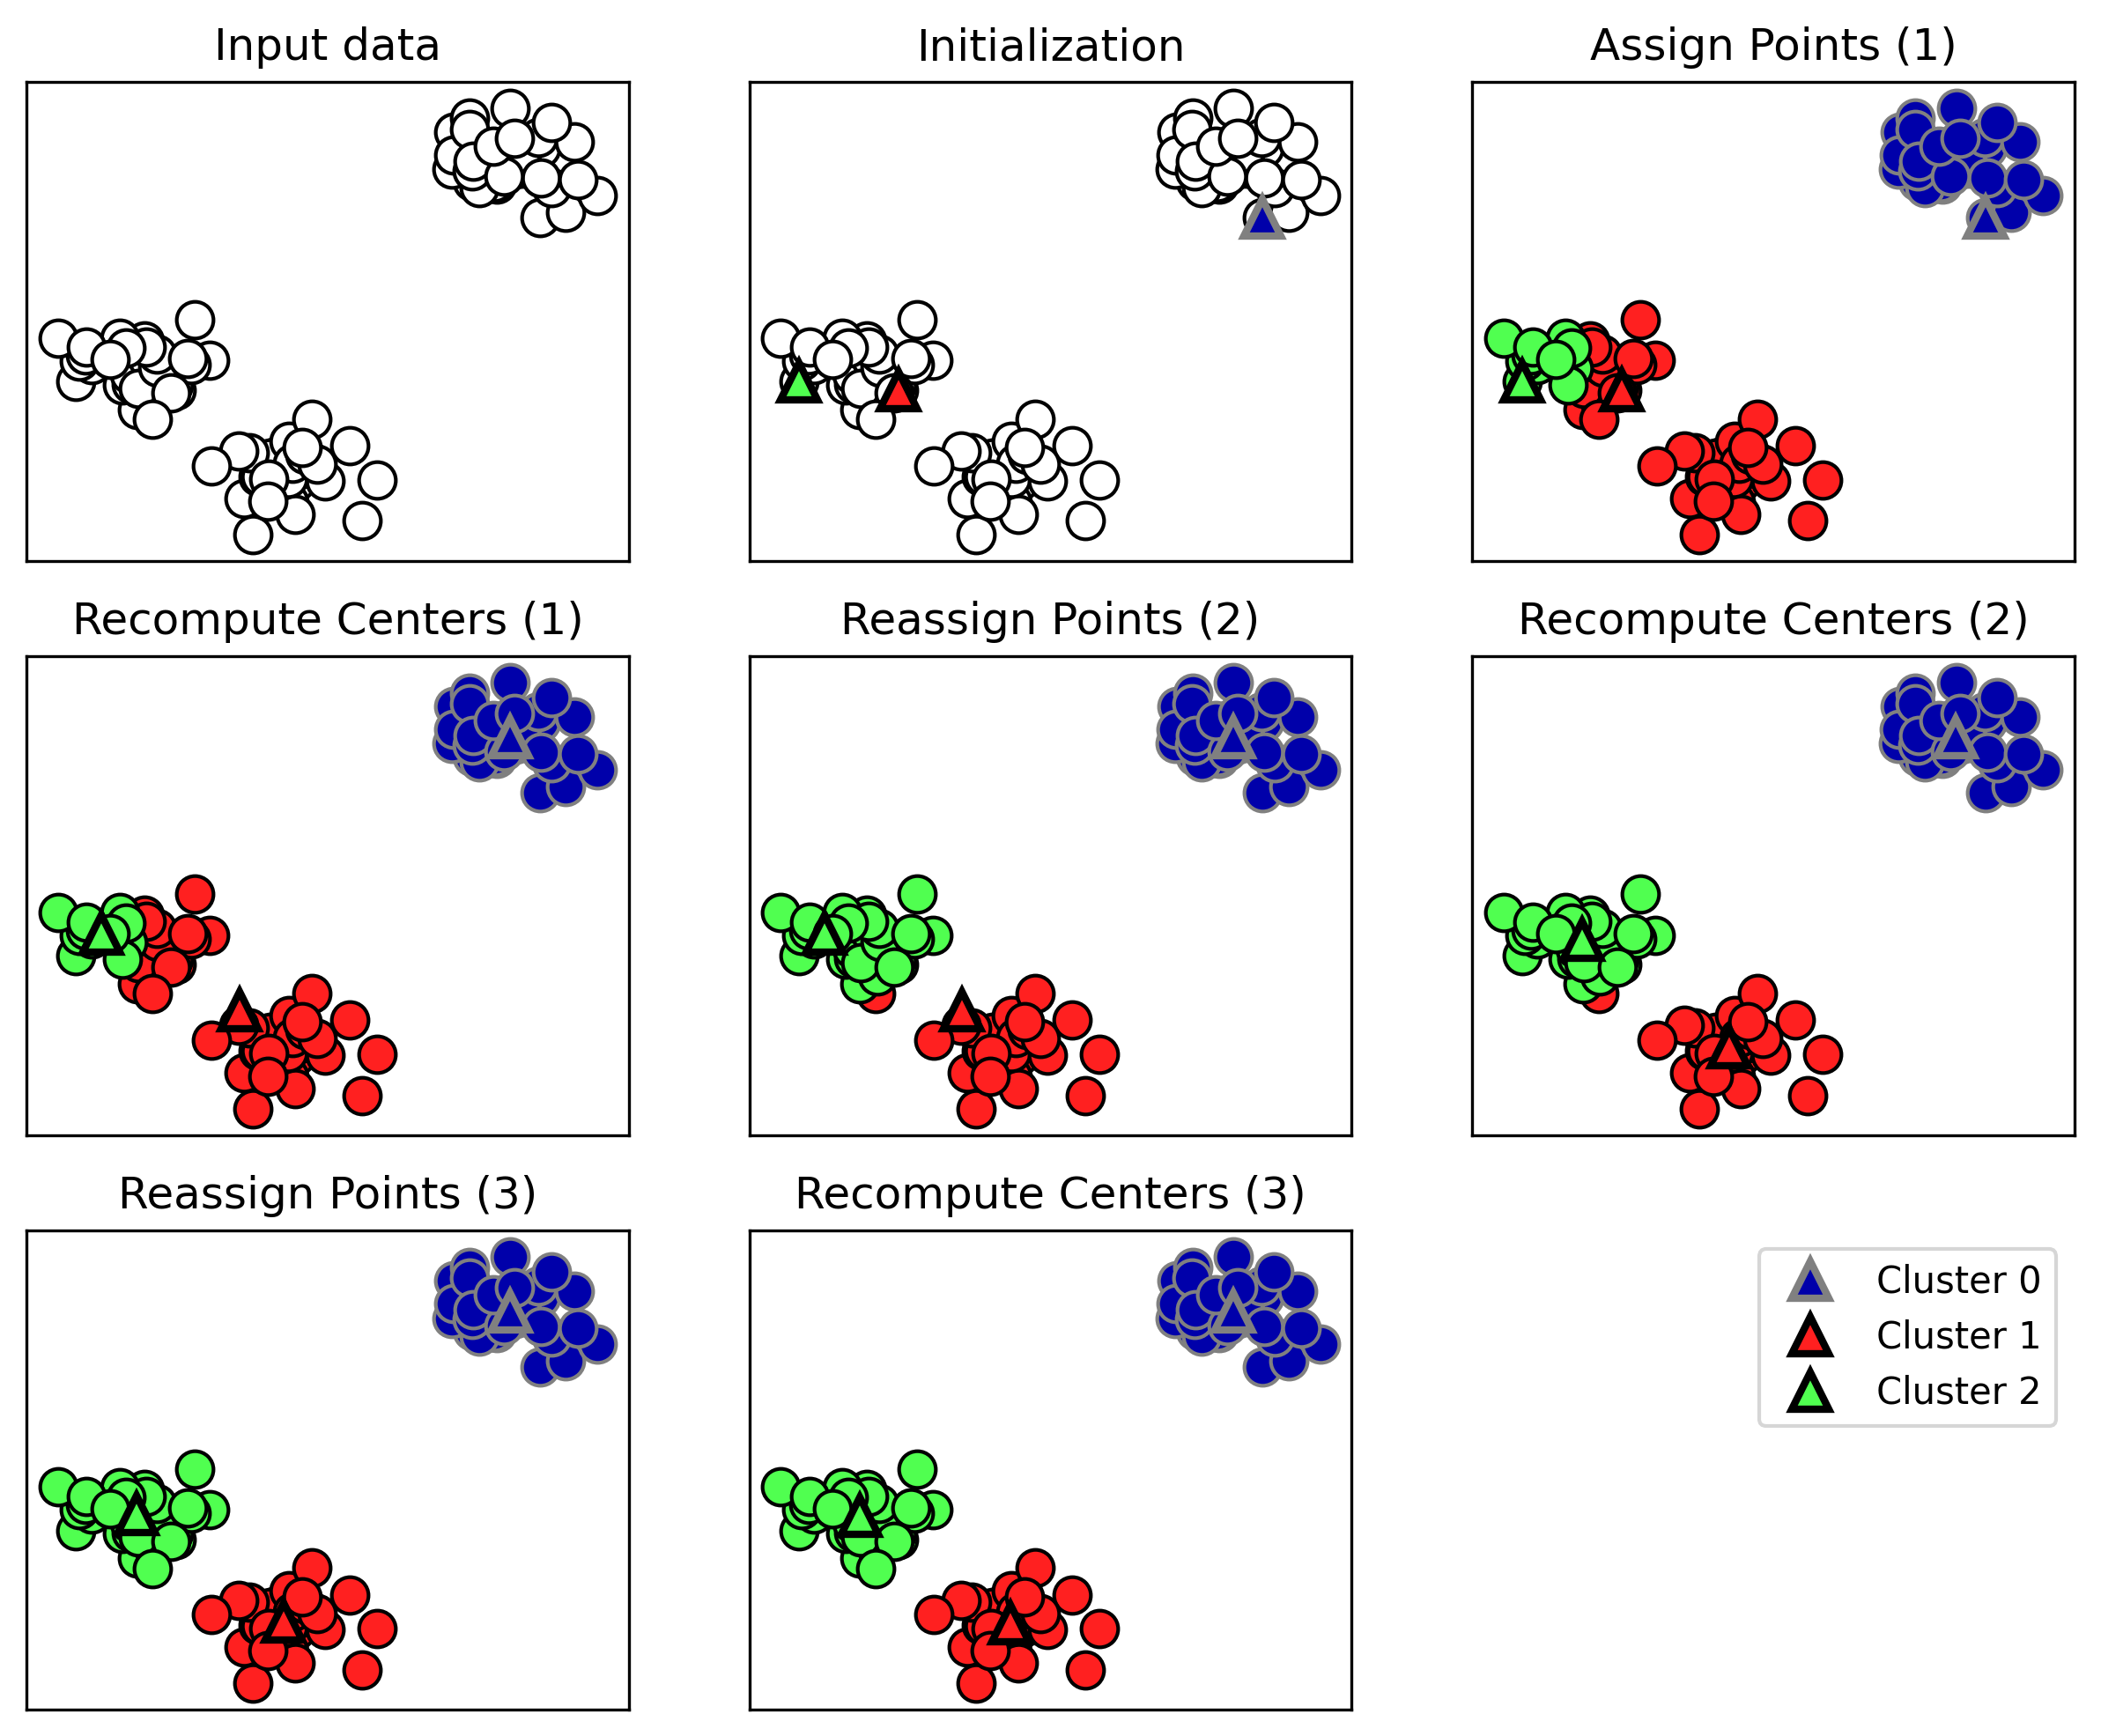

In [3]:
mglearn.plots.plot_kmeans_algorithm()

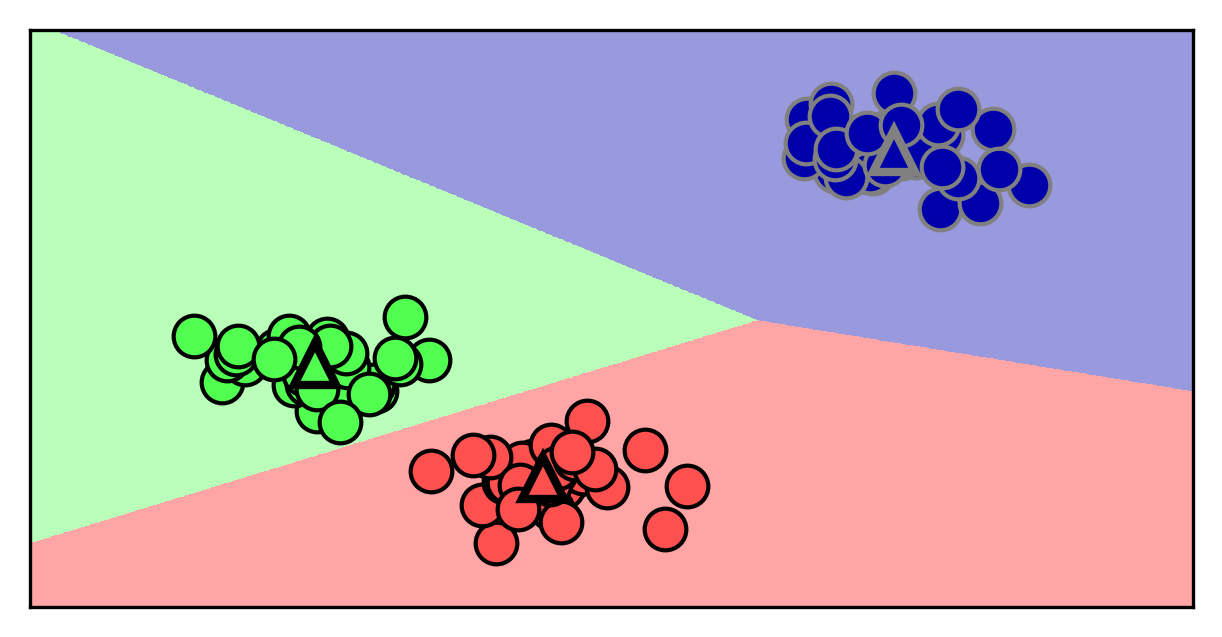

In [4]:

mglearn.plots.plot_kmeans_boundaries()

In [5]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# generate synthetic two-dimensional data
X, y = make_blobs(random_state=1)

# build the clustering model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
print(X.shape)
X



(100, 2)


array([[ -0.794,   2.105],
       [ -9.152,  -4.813],
       [-11.442,  -4.458],
       [ -9.768,  -3.191],
       [ -4.537,  -8.402],
       [ -6.263,  -8.107],
       [ -6.385,  -8.473],
       [ -9.205,  -4.577],
       [ -2.76 ,   5.551],
       [ -1.171,   4.331],
       [-10.036,  -5.569],
       [ -9.876,  -2.824],
       [ -7.175,  -8.771],
       [ -2.407,   6.099],
       [ -4.874, -10.05 ],
       [ -6.079,  -7.94 ],
       [ -6.832,  -7.471],
       [ -2.347,   3.561],
       [-10.342,  -3.91 ],
       [-11.093,  -3.784],
       [ -6.502,  -7.912],
       [-10.264,  -3.921],
       [ -6.816,  -8.45 ],
       [ -1.341,   4.157],
       [-10.373,  -4.592],
       [ -7.375, -10.588],
       [ -6.624,  -8.253],
       [ -1.359,   4.054],
       [ -0.197,   2.346],
       [ -6.544,  -9.298],
       [ -1.927,   4.937],
       [ -2.802,   4.057],
       [ -7.582,  -9.15 ],
       [ -1.851,   3.519],
       [ -8.37 ,  -3.615],
       [ -7.251,  -8.255],
       [ -8.799,  -3.768],
 

In [6]:
print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


In [7]:
print("true clusters:\n{}".format(y))

true clusters:
[0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]


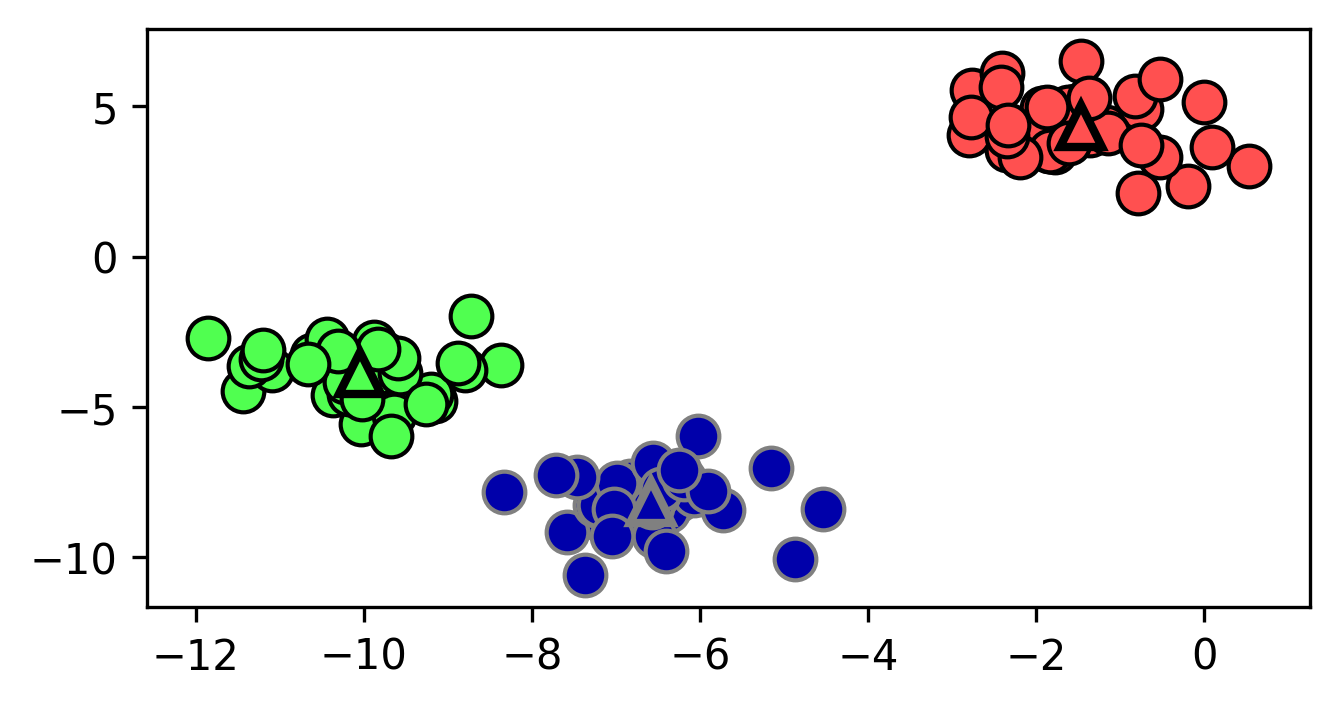

In [8]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)

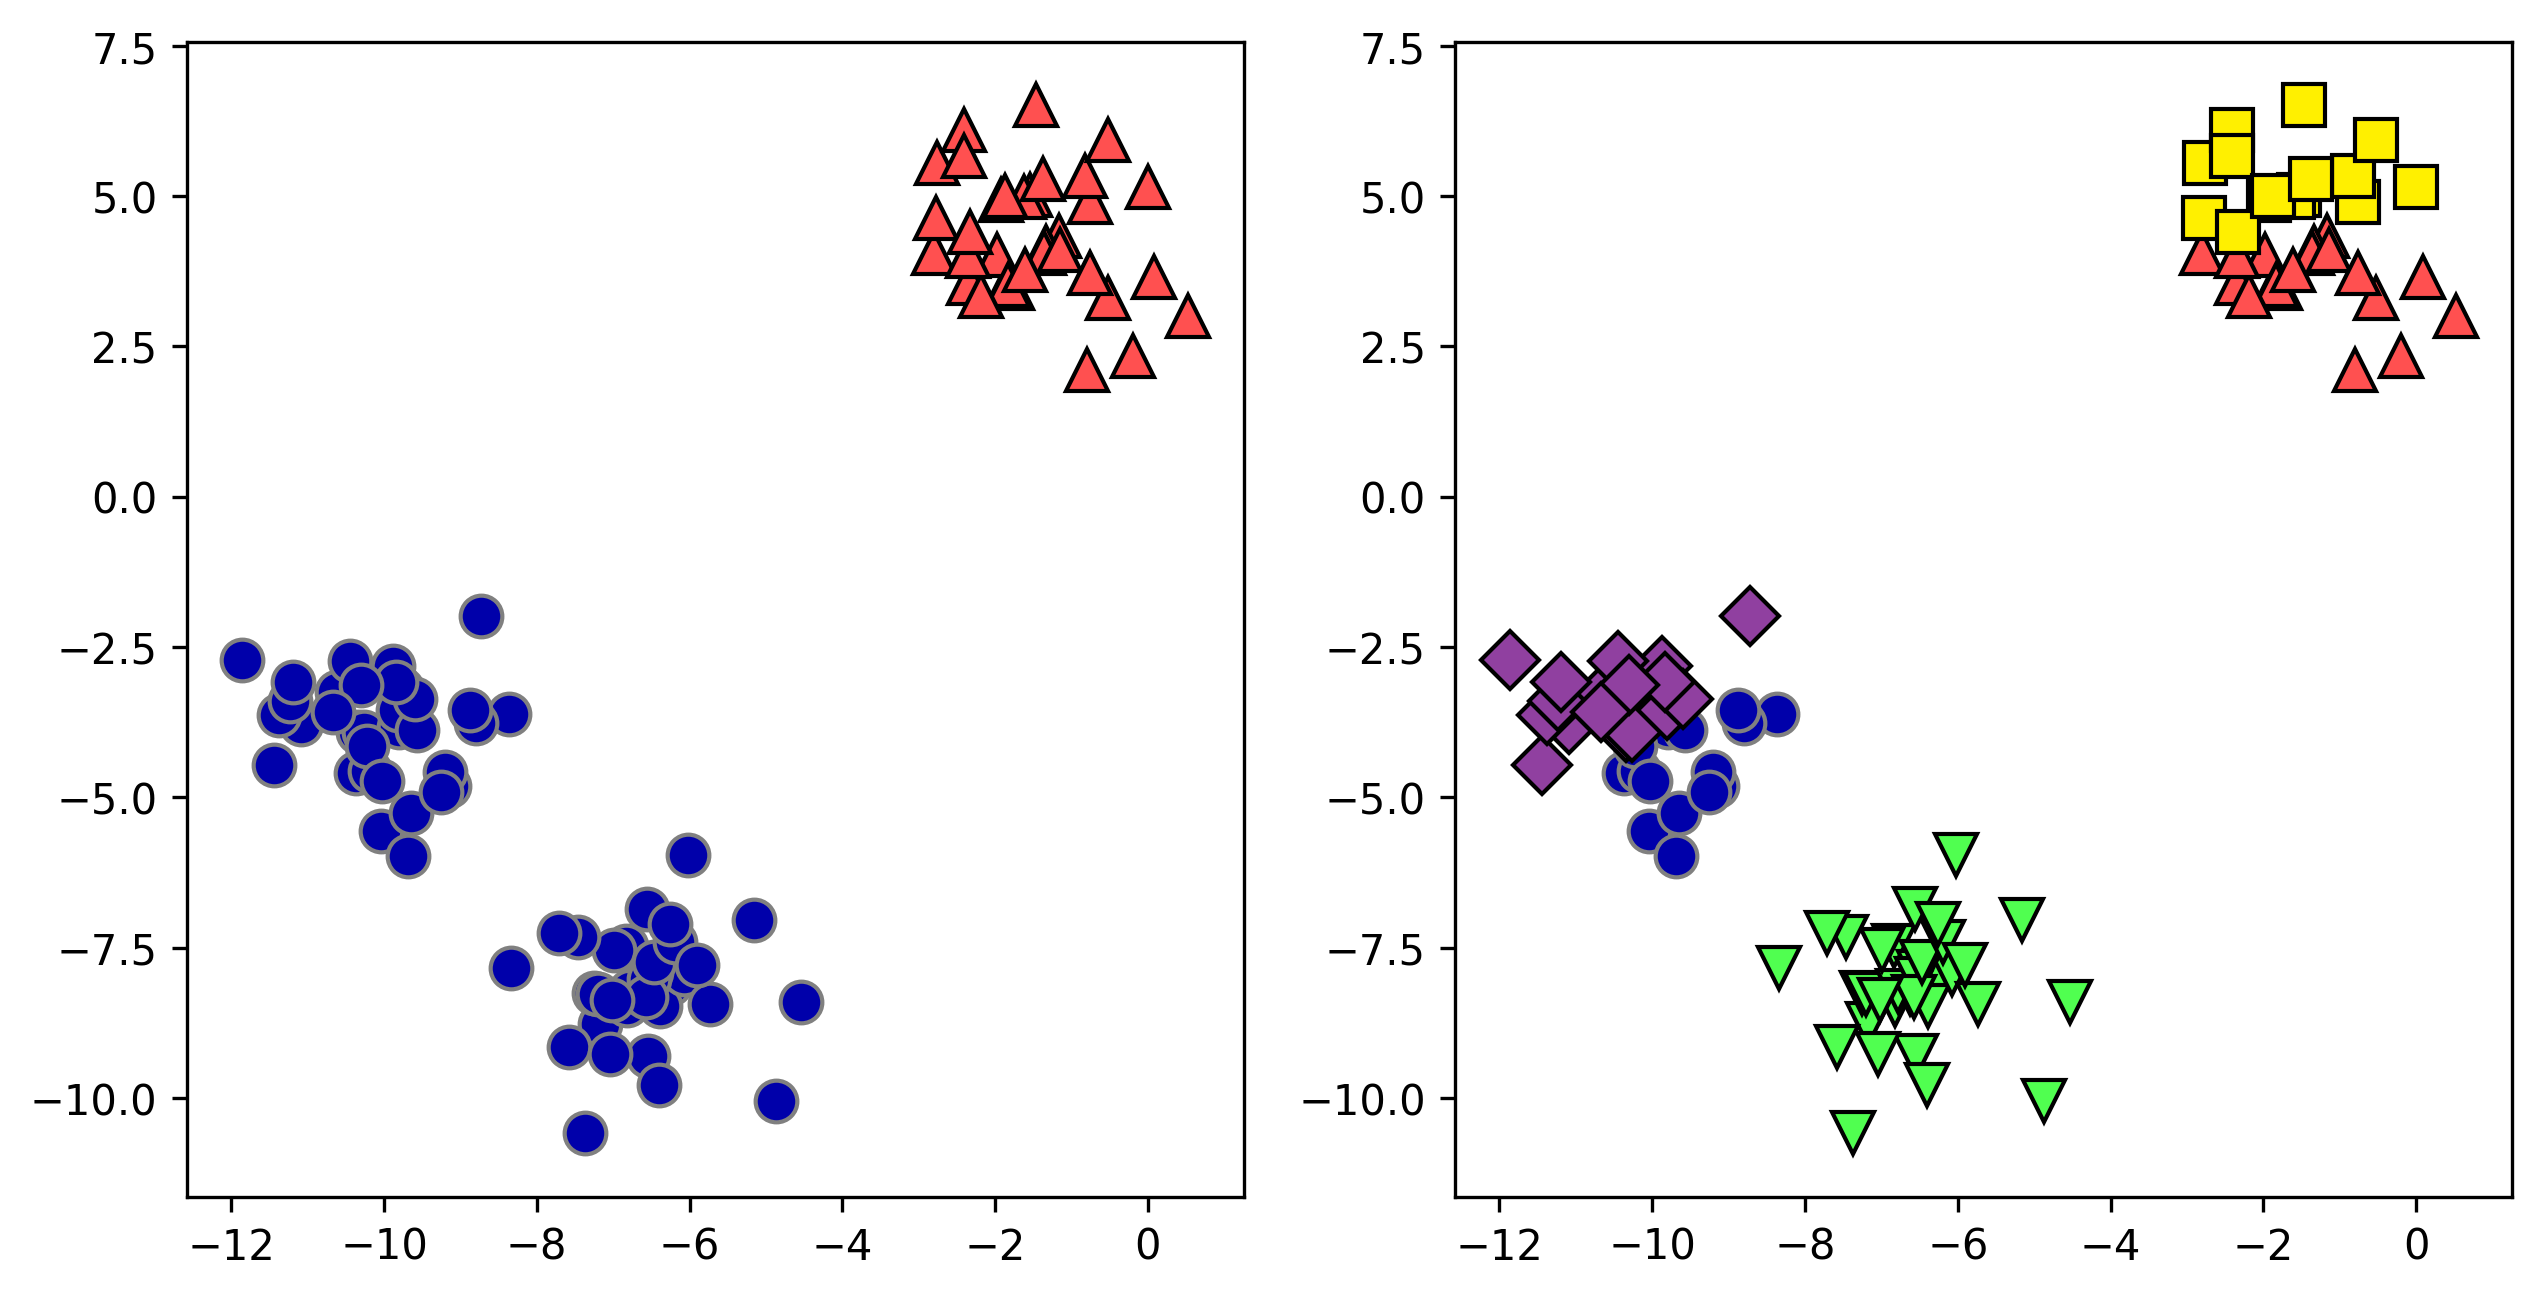

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# using two cluster centers:
kmeans = KMeans(n_clusters=2,random_state=1)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

# using five cluster centers:
kmeans = KMeans(n_clusters=5,random_state=1)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

##### Failure cases of k-Means

Text(0, 0.5, 'Feature 1')

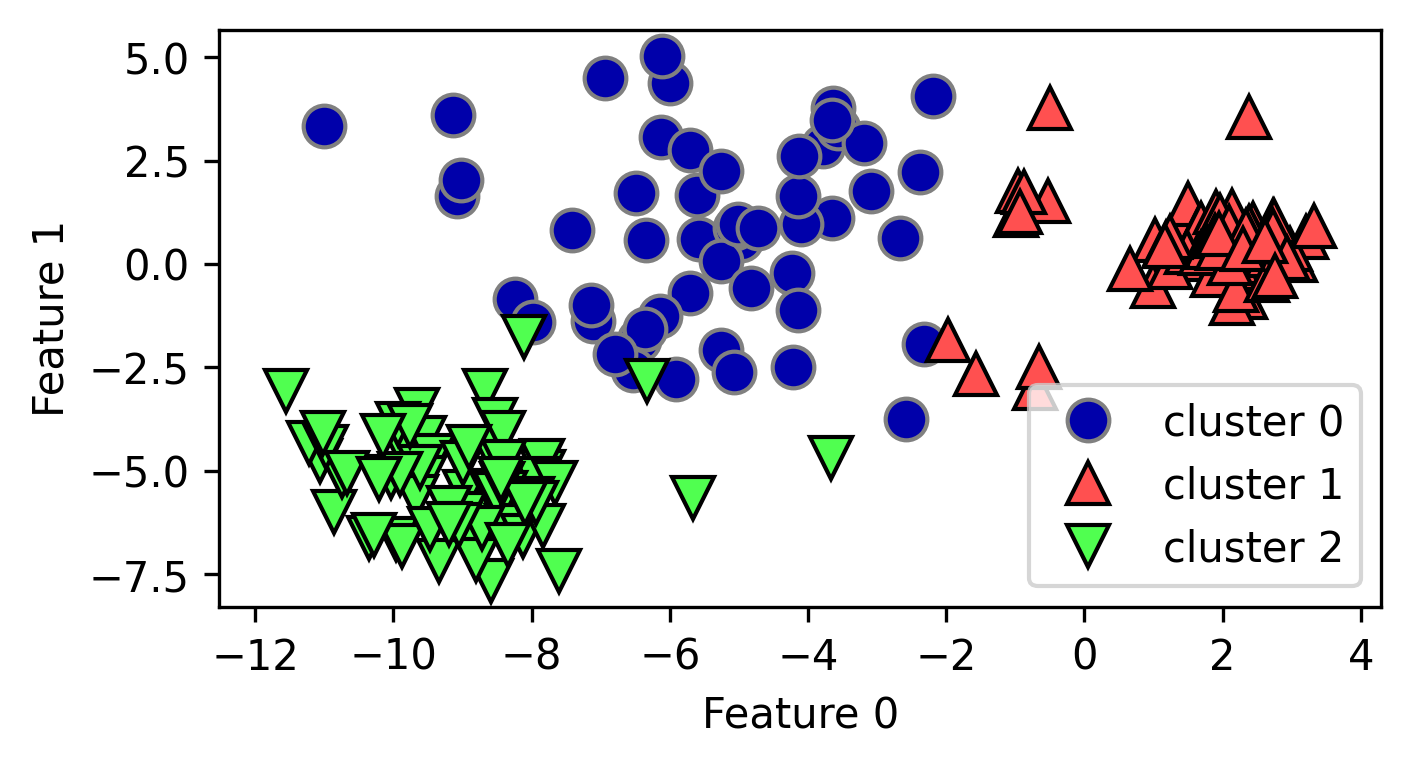

In [10]:
from sklearn.datasets import make_blobs
X_varied, y_varied = make_blobs(n_samples=200,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)

mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc='best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

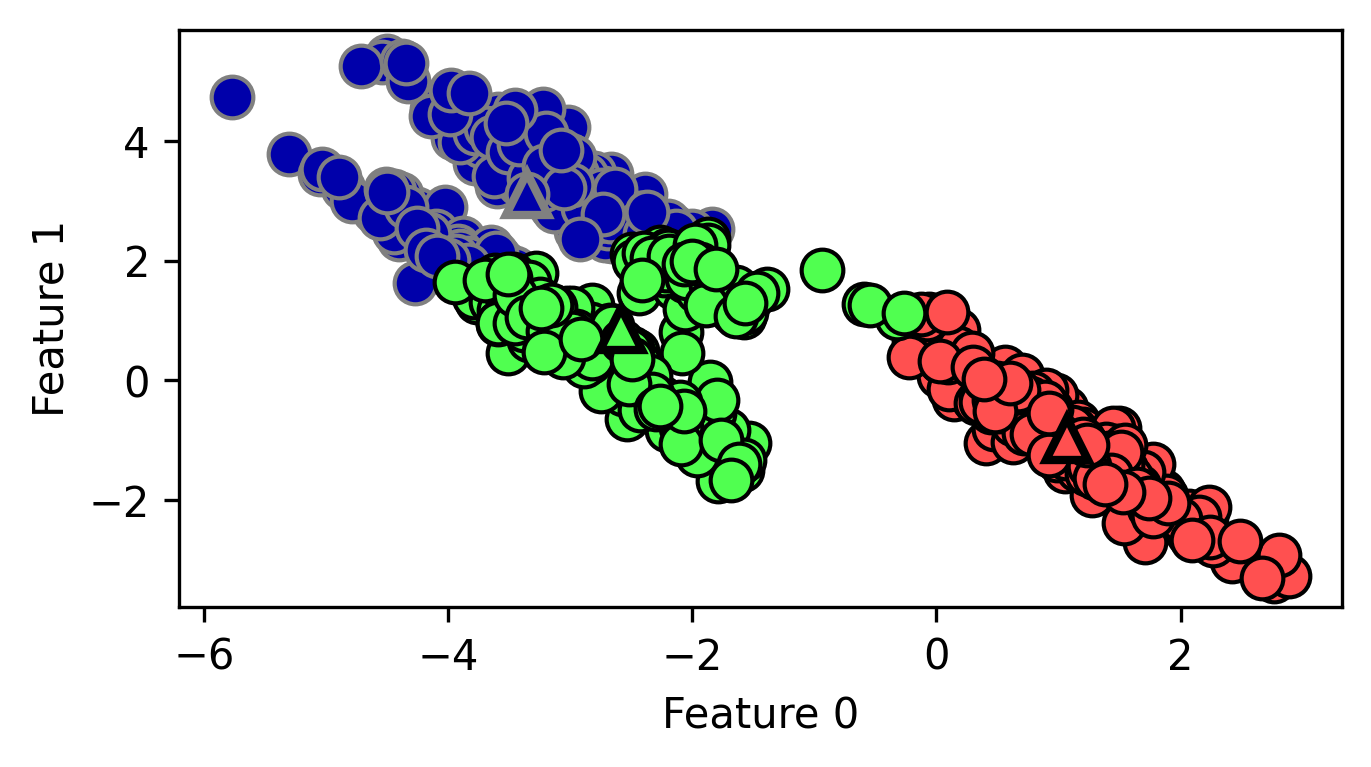

In [11]:
## generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# cluster the data into three clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

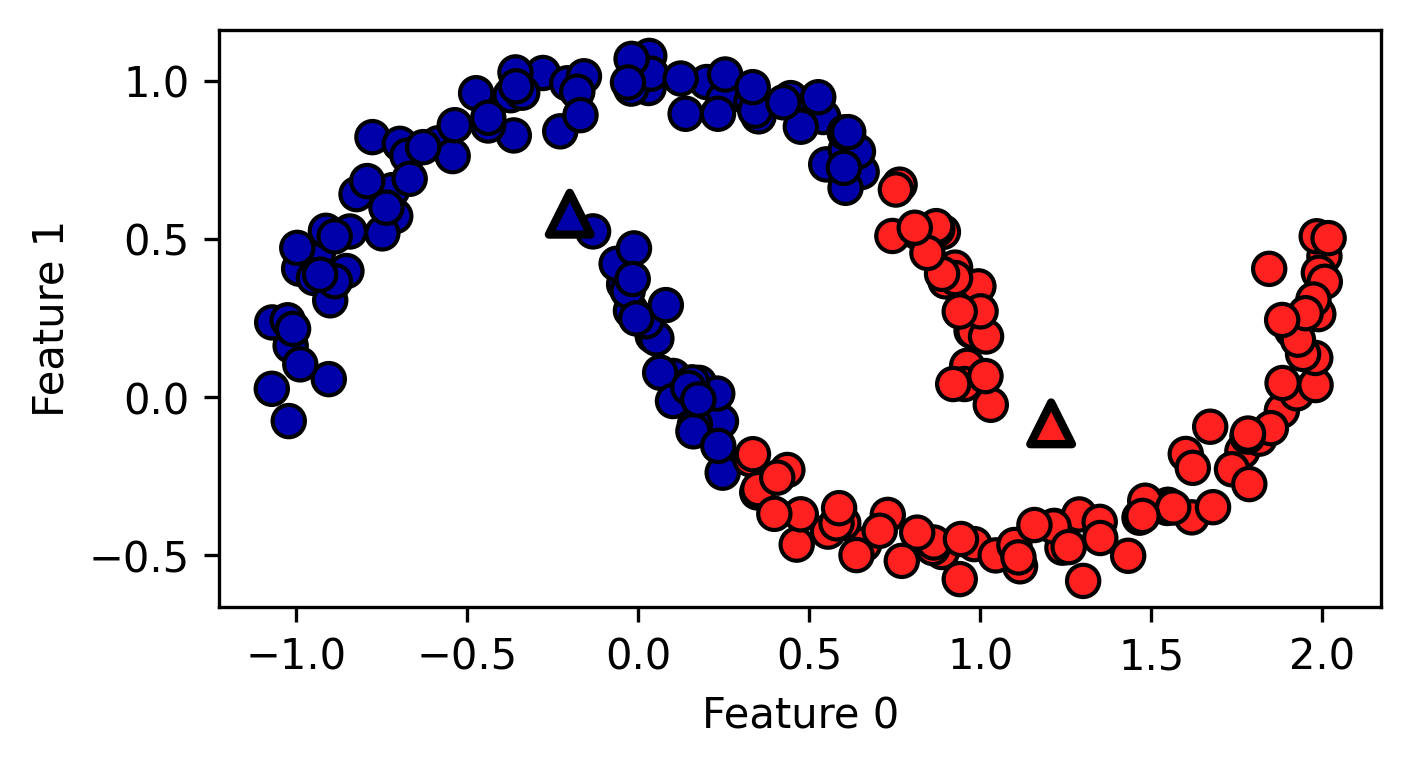

In [12]:
# generate synthetic two_moons data (with less noise this time)
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# cluster the data into two clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2,
            edgecolor='k')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Cluster memberships:
[8 4 6 3 1 1 5 2 8 4 9 2 1 4 7 5 0 2 0 7 1 2 0 4 9 6 1 1 6 0 8 9 2 6 8 1 2
 5 3 6 2 7 8 6 4 9 5 7 6 2 7 2 1 3 4 8 0 4 0 9 2 3 1 8 4 3 9 4 9 3 2 3 2 6
 2 3 6 8 0 2 1 9 2 1 6 9 5 9 2 1 0 5 1 7 1 1 4 2 3 6 4 1 9 5 3 6 3 7 4 0 7
 9 9 3 8 4 8 1 2 8 8 7 6 9 6 7 5 6 4 1 5 7 3 6 4 4 4 3 1 8 6 6 0 9 7 5 6 4
 0 6 2 4 8 0 2 9 4 2 0 0 6 4 0 4 2 1 0 2 4 2 0 3 3 7 6 2 1 7 7 0 4 3 1 4 1
 0 9 2 3 7 3 0 8 5 6 7 1 6 9 4]


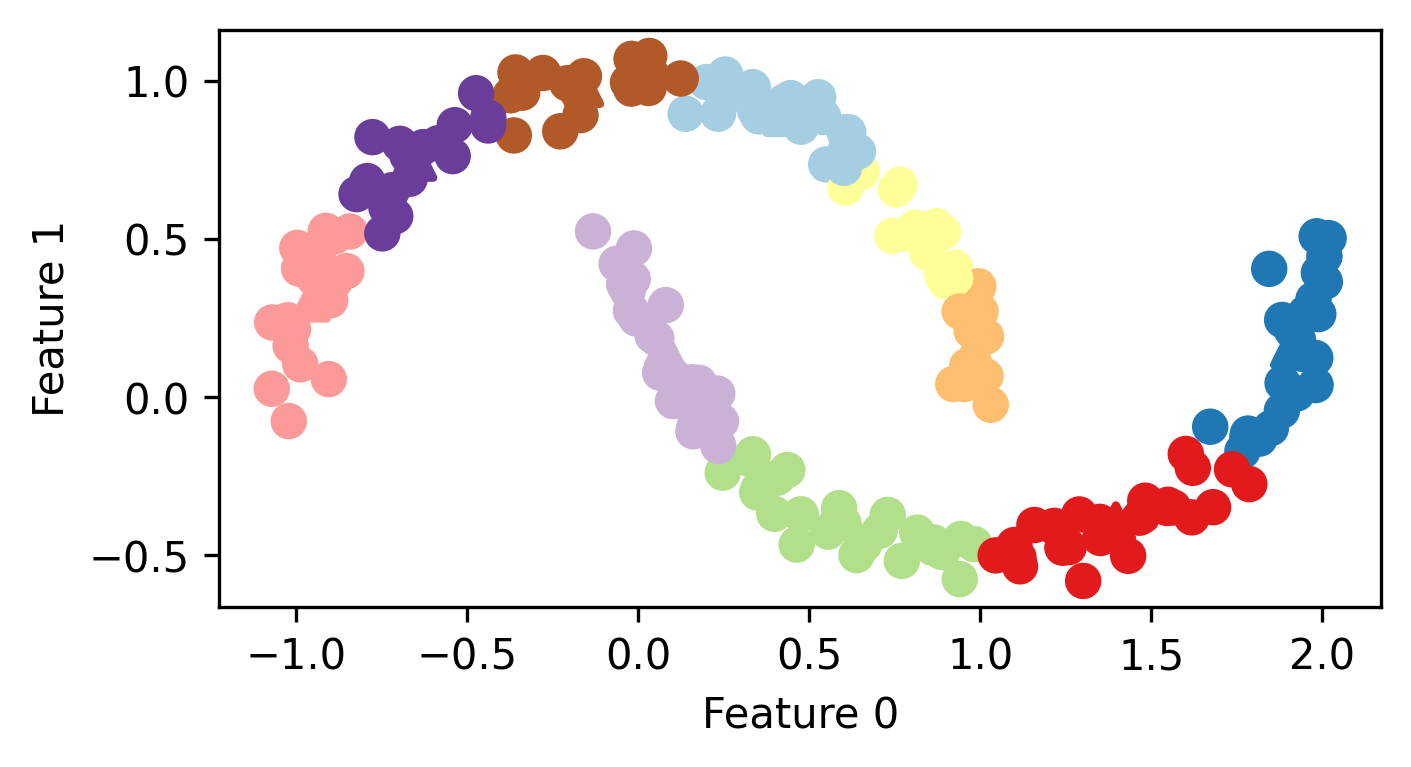

In [13]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60,
            marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
print("Cluster memberships:\n{}".format(y_pred))

#### Agglomerative Clustering

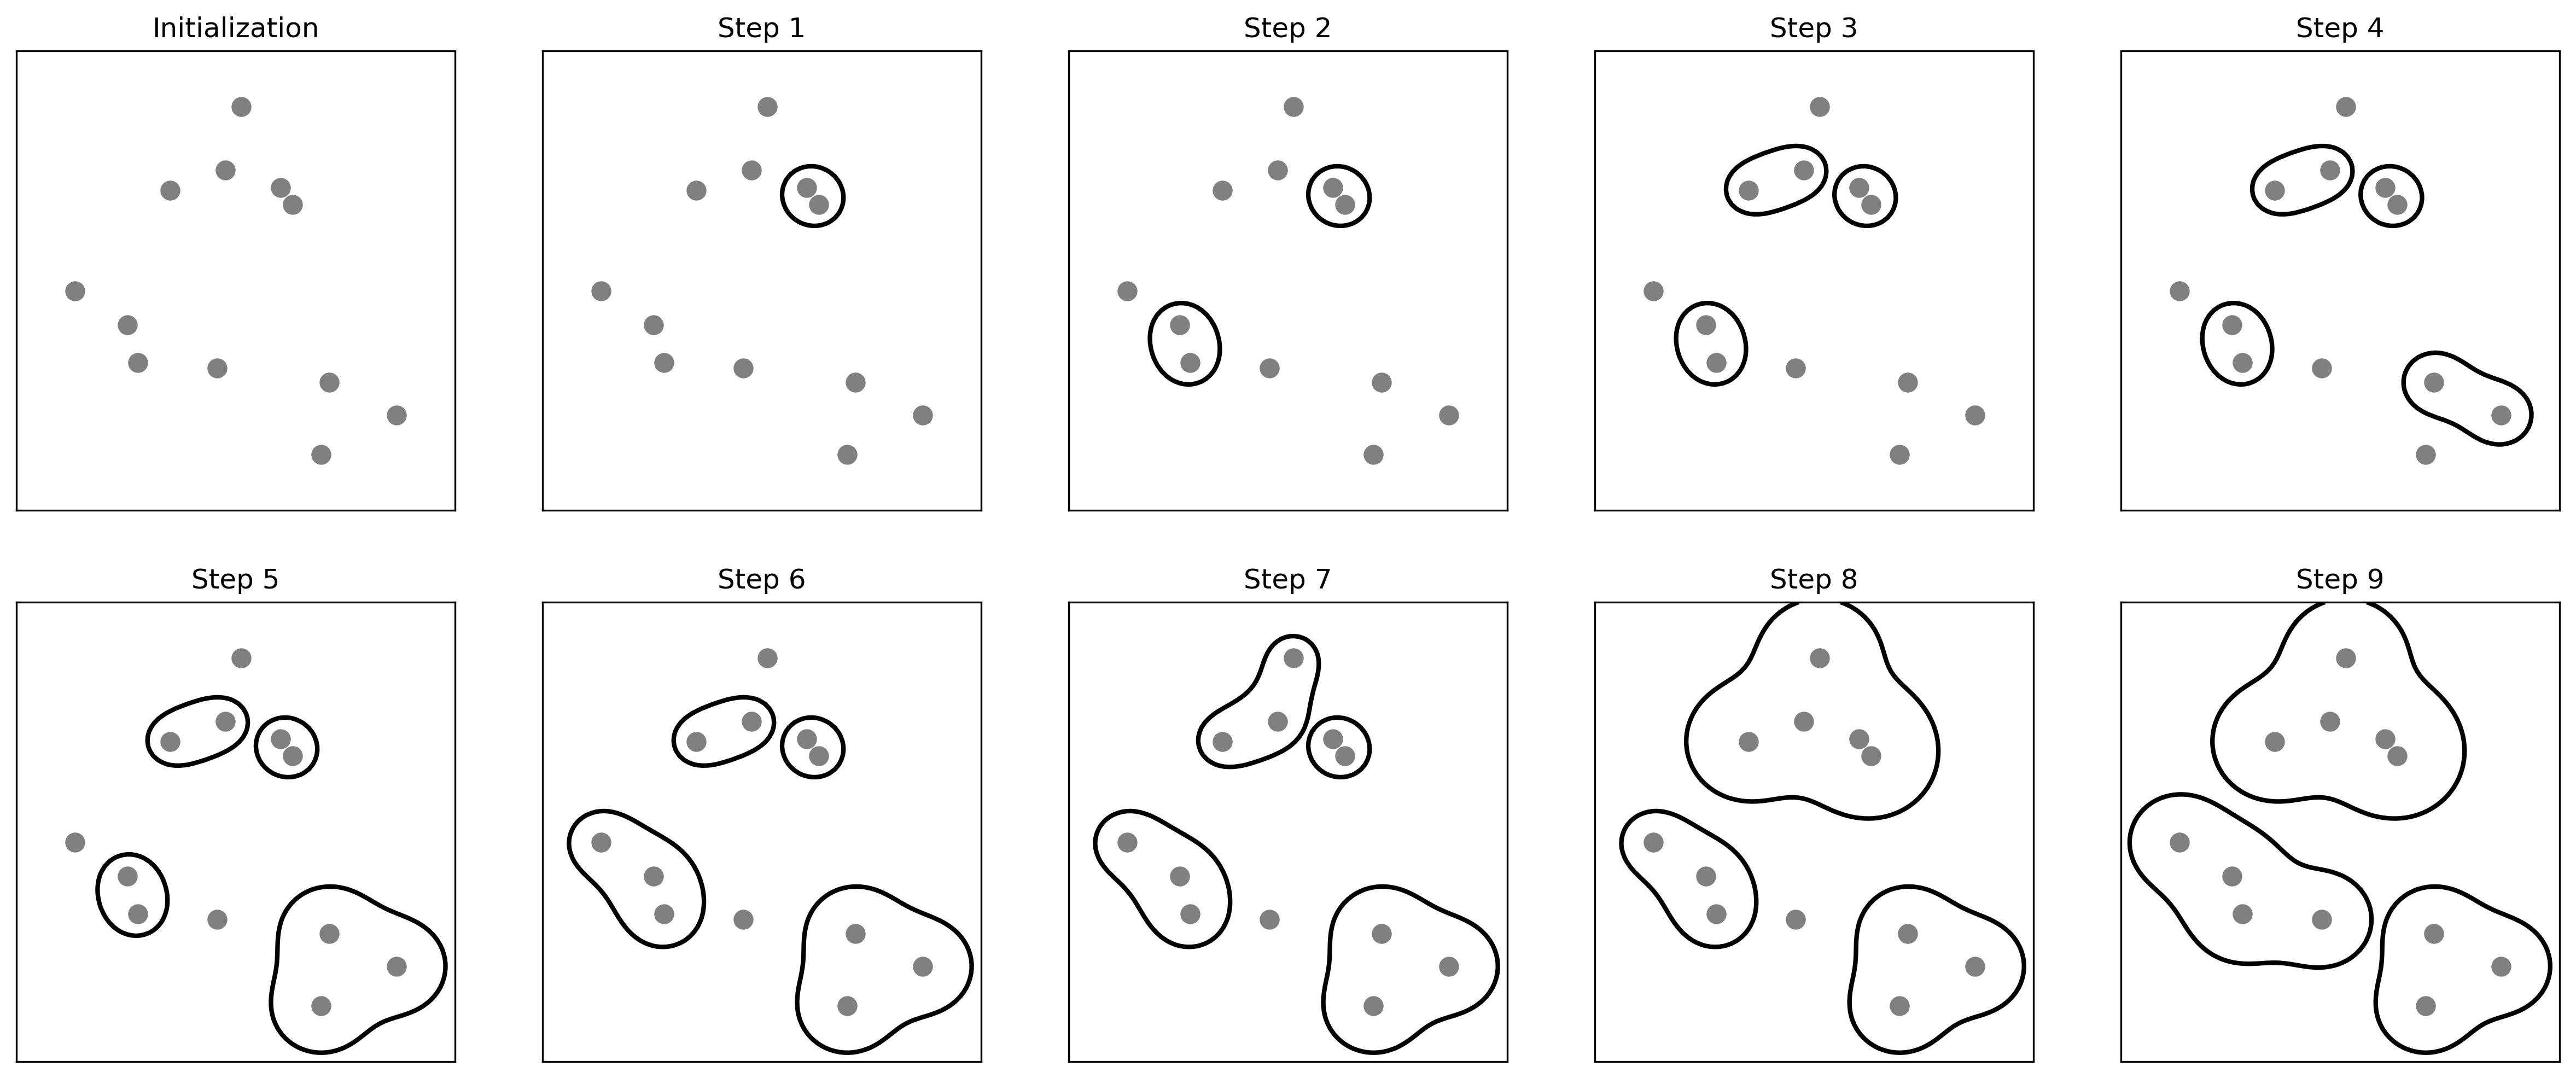

In [14]:
mglearn.plots.plot_agglomerative_algorithm()

Text(0, 0.5, 'Feature 1')

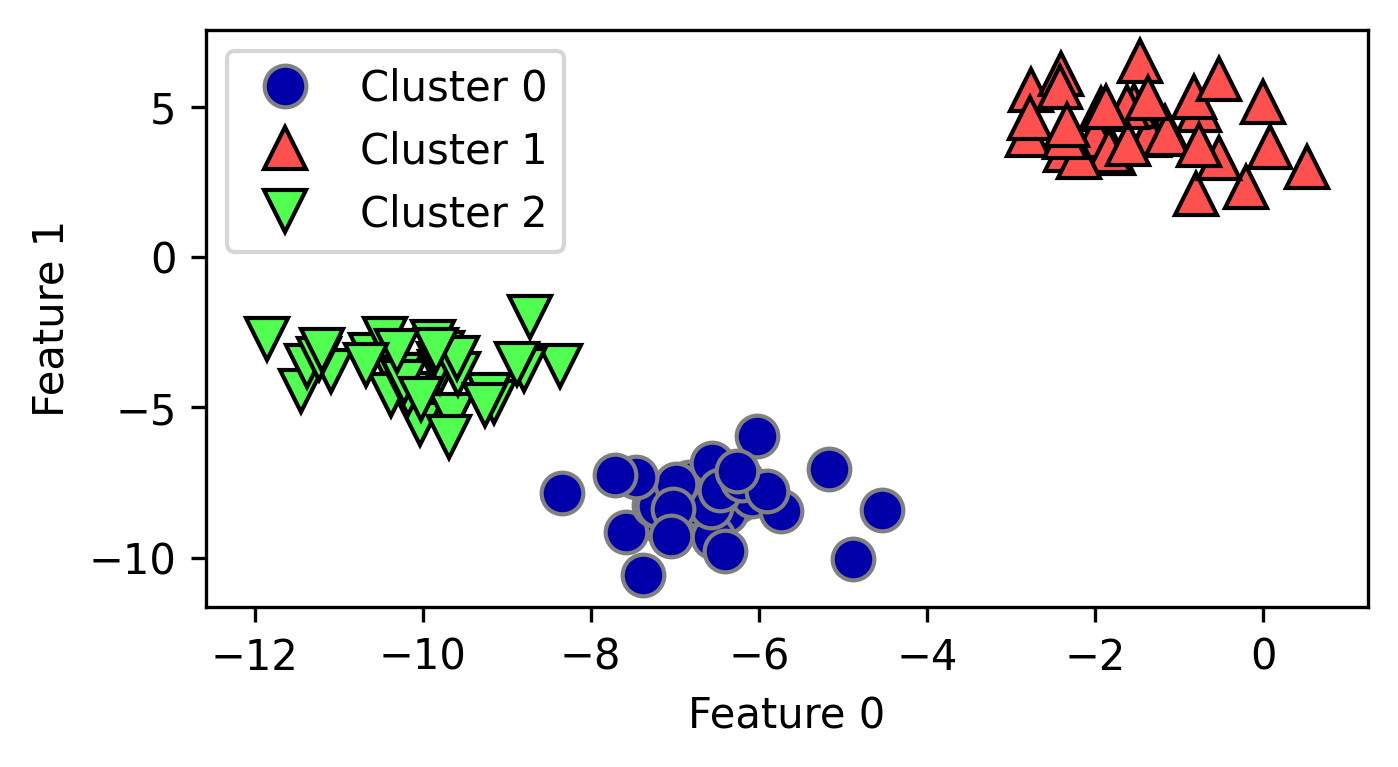

In [15]:
from sklearn.cluster import AgglomerativeClustering
X, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3,linkage='complete')
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

##### Hierarchical Clustering and Dendrograms

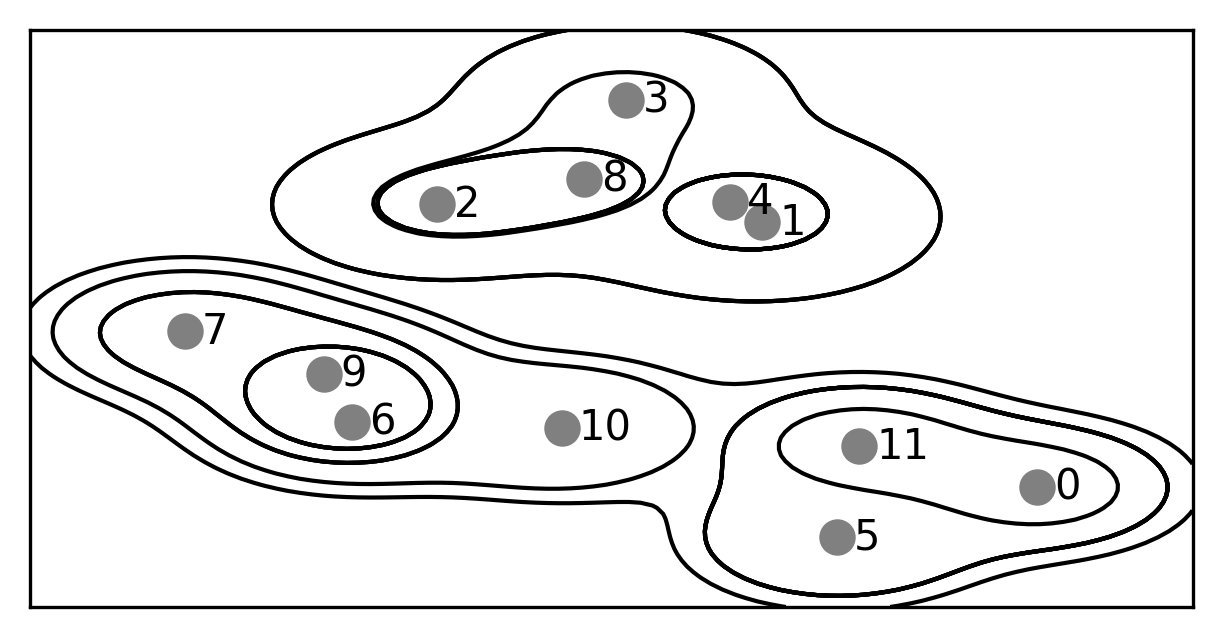

In [16]:
mglearn.plots.plot_agglomerative()

Text(0, 0.5, 'Cluster distance')

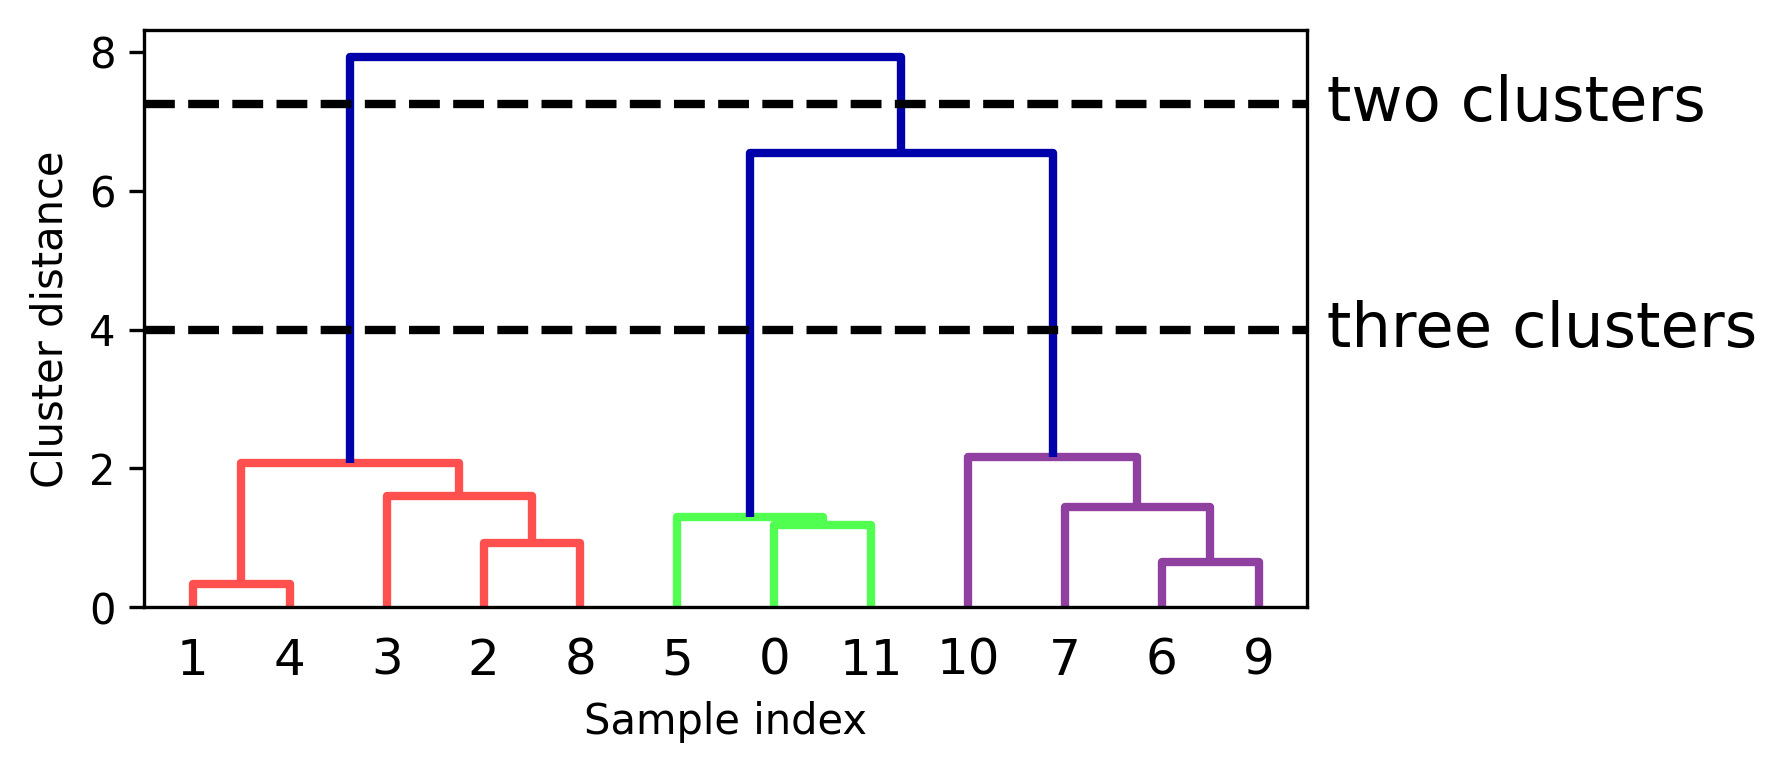

In [17]:
# Import the dendrogram function and the ward clustering function from SciPy
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state=0, n_samples=12)
# Apply the ward clustering to the data array X
# The SciPy ward function returns an array that specifies the distances
# bridged when performing agglomerative clustering
linkage_array = ward(X)
# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
dendrogram(linkage_array)

# mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

Text(0, 0.5, 'Feature 1')

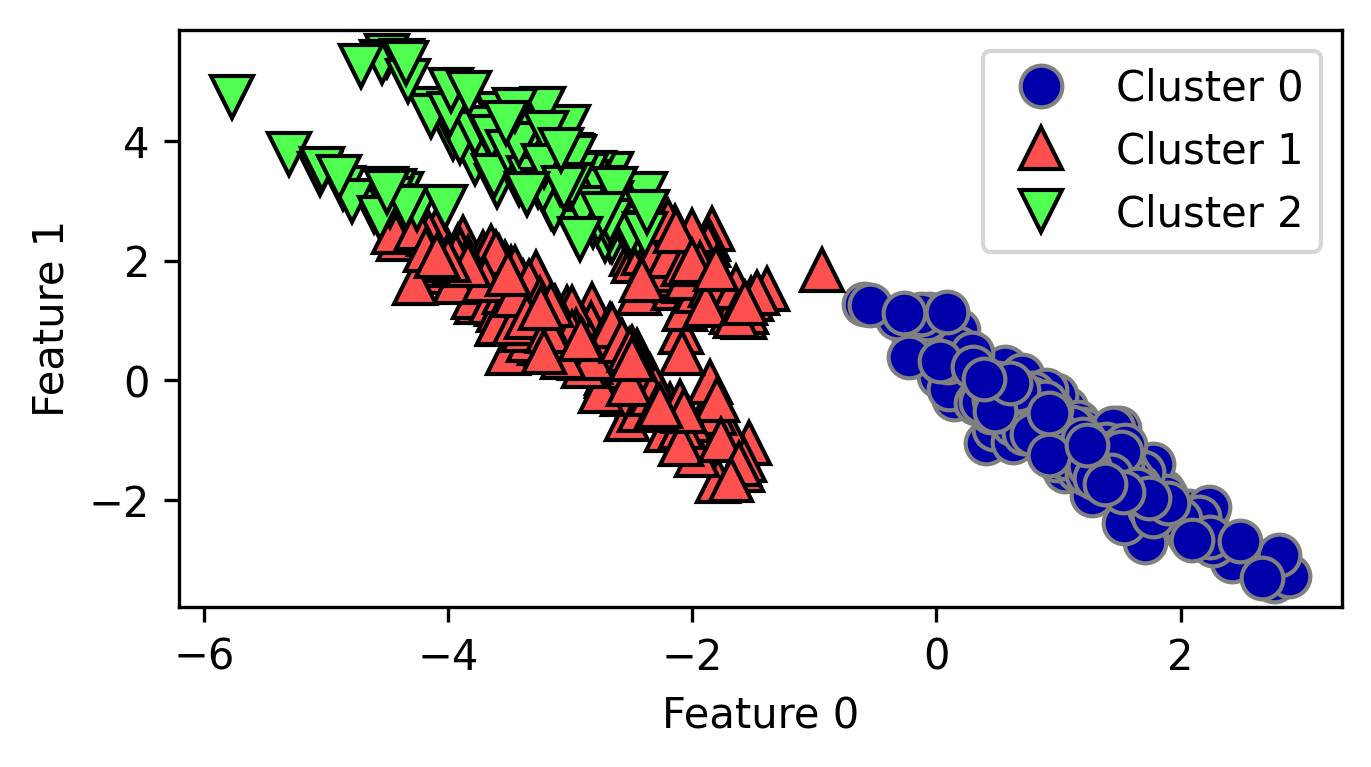

In [18]:
# apply Agglomerative clustering to "stretched out " blobs
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# cluster the data into three clusters
agg = AgglomerativeClustering(n_clusters=3,linkage = 'ward')
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#### DBSCAN

In [19]:
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN(min_samples=2,eps=1.5)
clusters = dbscan.fit_predict(X)
print("Cluster memberships:\n{}".format(clusters))

Cluster memberships:
[0 1 1 1 1 0 2 2 1 2 2 0]


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


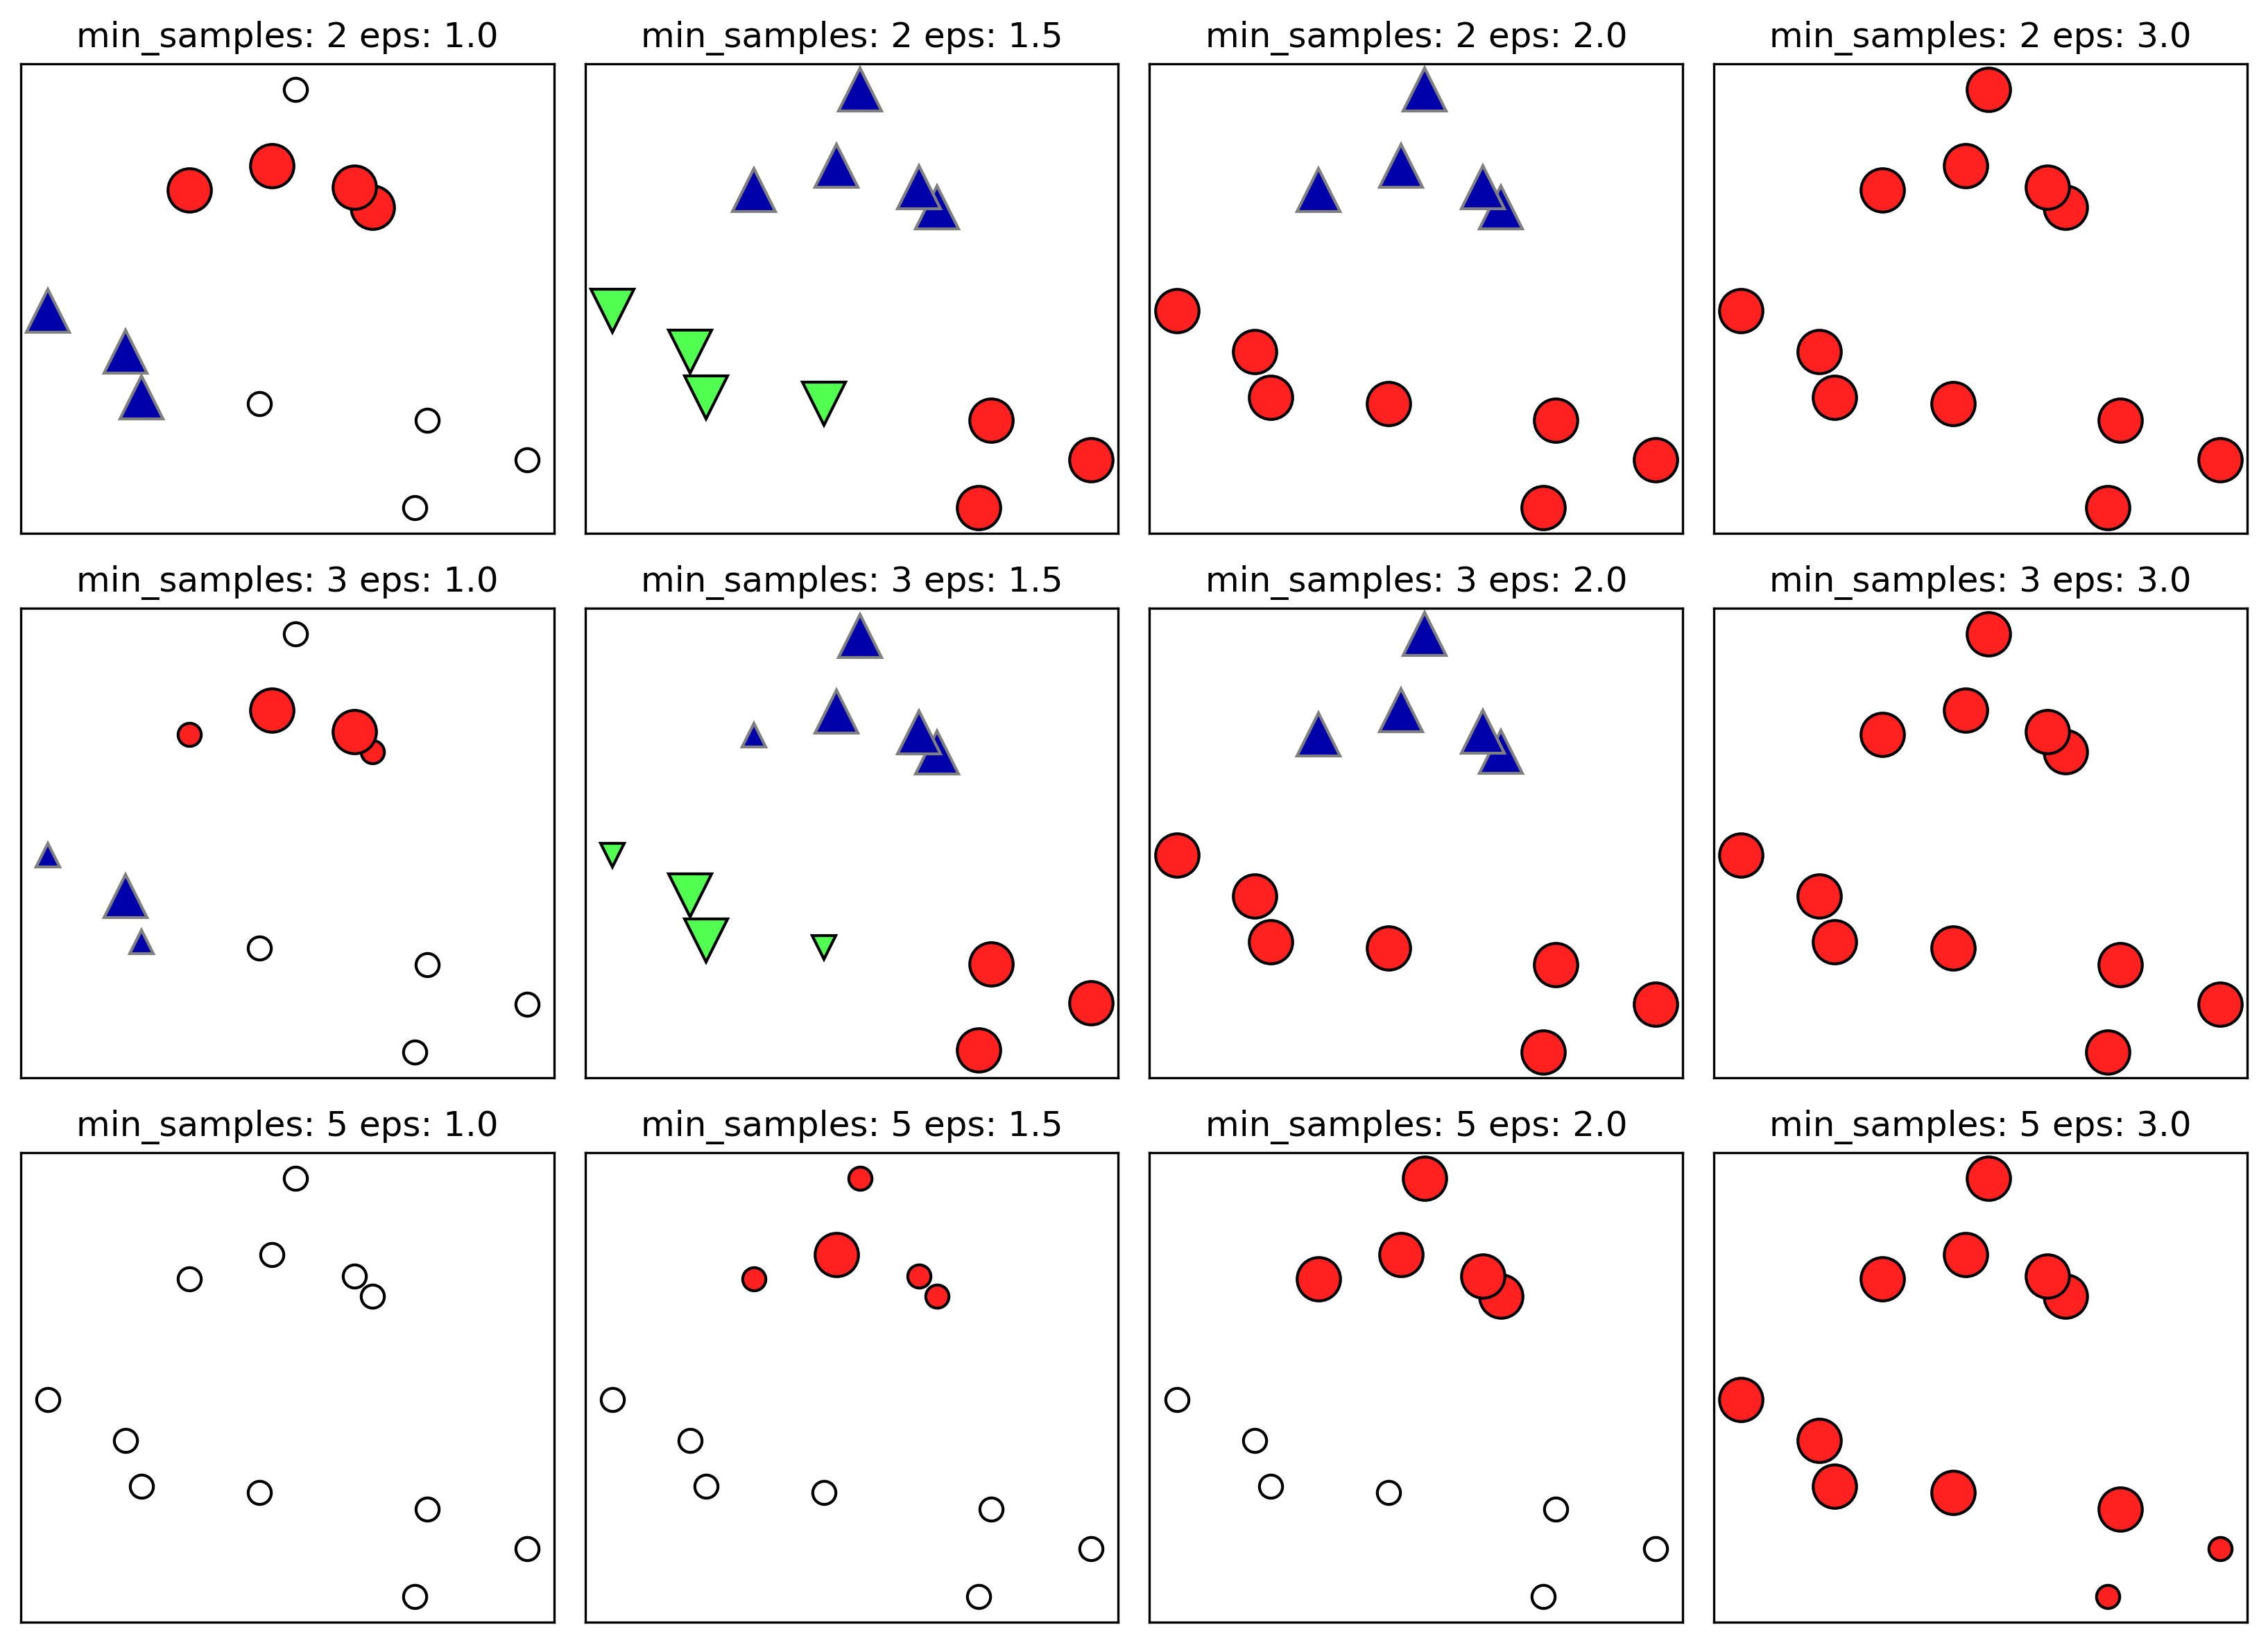

In [20]:
mglearn.plots.plot_dbscan()

array([ 0,  1,  2, -1,  3, -1,  4,  5,  6,  7, -1, -1,  3,  8,  9,  4, 10,
       11, 12, -1, 13,  5, 14, 15, 16, 17,  3, 13, 17, -1,  0, -1,  5,  2,
       18, 19, 11, 20, 21, 22, 23, 24, 25, 26,  1, 16,  4, 27, 17,  5, 28,
       29, 13, -1,  7, 18, 25, 30, 12, 31, 11, -1,  3,  0,  7, 32, 31,  1,
       33, 34, 35, 36, -1, -1,  5, 36,  2,  6, 37, -1, 19, 33, 35, -1,  2,
       16, 20, 16, 23, 38, 12,  6, 19, 28, 38,  3, -1, 11, 32, 26, -1, 19,
       39, -1, -1, -1, -1, -1,  1, 12, 28, 33, 39, 36,  6, -1, -1, 19, 23,
        0,  0, 40, 22, 33, -1,  9, 20, 26, 15, 41, 42, 28, 34, -1,  8, 43,
        8, 32, 41,  6, 26, -1, 44, 16, 24, 20, 26, -1, 14,  2, 45,  1, -1,
       12, 23, 31, 30, 29, 44, 37, 26,  7, 46,  1, 45, -1, 10, -1,  1, -1,
       46, -1, 21, -1, 26,  5, -1, 27, 40, 25,  1, 21, 19, -1, 19, 12, -1,
       -1, 36, 28, 36, 44,  0, 42, 22, -1, 19, 26, 14, 43])

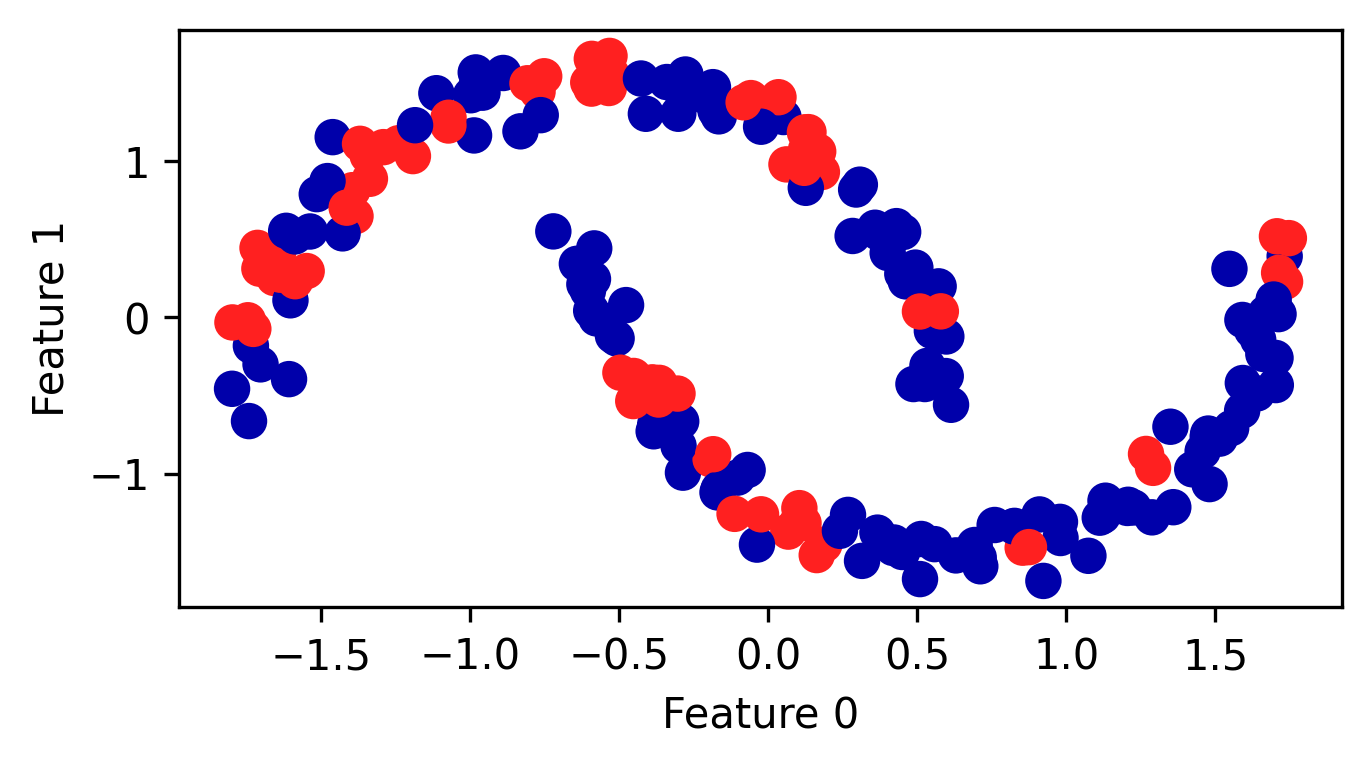

In [21]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# Rescale the data to zero mean and unit variance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN(eps=.1,min_samples=2)
clusters = dbscan.fit_predict(X_scaled)
# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
clusters

To try on your own: load the housing data and create clusters of houses using a couple of the methods above.
First, load the housing data:

###Cheat:

In [22]:
# Read in some real-life data
housedata=pd.read_csv('./data/housingprices.csv')

###Define x matrix:

###Cheat:

In [23]:
x=housedata.loc[:,[x for x in housedata.columns if x not in ('price','lprice')]]


###Building clustering model and fit to data:

###Cheat:

In [24]:
# build the clustering model
kmeans = KMeans(n_clusters=12)
kmeans.fit(x)


KMeans(n_clusters=12)

In [25]:
kmeans.labels_

array([ 9,  4,  4,  4,  4,  4,  1,  1,  6,  1,  1,  1,  1,  9,  9,  9,  9,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  6,  1,  6,  1,
        1,  9,  1,  9,  9,  4,  4,  4,  4,  4,  4,  4,  1,  6,  6,  1,  1,
        4,  4,  4,  3,  4,  9,  4,  9,  9,  1,  1,  9,  9,  4,  9,  9,  9,
        1,  9,  9,  9,  9,  9,  3,  3,  3,  3,  3,  3,  9,  9,  9,  9,  4,
        4,  1,  4,  9,  9,  9,  9,  9,  9,  1,  9,  1,  9,  9,  9,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  6,  4,  6,  6,  6,  4,  6,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3, 10,  3, 10, 10, 10, 10, 10, 10,  3, 10, 10, 10,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  1,  9,  9,  9,  9,  9,  9,  4,  4,  4,  4,  4,  4,  4,  4,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  9,  9,  9,  3,  3,  9,  9,  4,
        4,  1,  1,  1,  1,  6,  1,  6,  1,  9,  6,  9,  1,  9,  1,  9,  9,
        1,  9,  9,  9,  9

In [26]:
kmeans.cluster_centers_

array([[18.974,  6.805,  5.41 ,  1.569, 24.   , 66.6  , 20.2  , 27.649,
         1.916,  6.501],
       [ 0.449,  5.053,  5.975,  4.692,  4.597, 29.571, 18.395, 14.51 ,
         1.615,  5.686],
       [ 5.151,  6.576,  6.176,  2.536, 24.   , 66.6  , 20.2  , 11.44 ,
         1.876,  6.501],
       [ 0.68 ,  5.745,  6.253,  3.206,  4.869, 40.851, 17.775, 11.352,
         1.727,  6.011],
       [ 0.068,  4.577,  6.698,  5.092,  3.696, 22.716, 17.932,  6.794,
         1.517,  5.421],
       [76.81 ,  6.81 ,  6.203,  1.55 , 24.   , 66.6  , 20.2  , 20.27 ,
         1.918,  6.501],
       [ 0.393,  5.316,  5.695,  3.619,  3.154, 24.323, 18.792, 25.671,
         1.666,  5.473],
       [ 9.607,  6.781,  6.185,  2.015, 24.   , 66.6  , 20.2  , 19.108,
         1.911,  6.501],
       [ 0.152,  6.09 ,  5.582,  1.876,  4.   , 71.1  , 20.1  , 20.626,
         1.807,  6.567],
       [ 0.209,  4.798,  6.654,  5.1  ,  4.623, 30.072, 17.482,  7.098,
         1.559,  5.703],
       [ 2.043,  7.776,  5.46 

In [27]:
kmeans.inertia_

14790.008581936343